In [1]:
import serial
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from scipy.signal import step, lti, TransferFunction
from lib import *

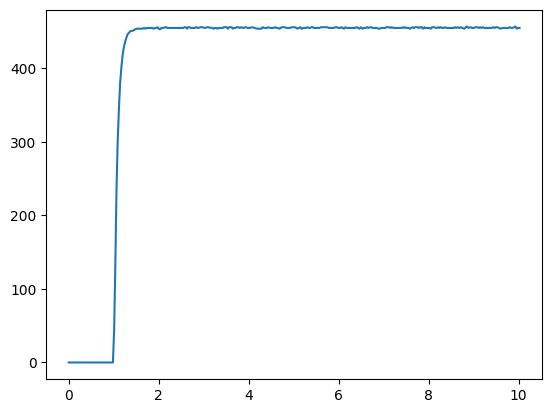

In [ ]:
# Configurações da porta serial
ser = serial.Serial('/dev/ttyUSB0',9600)
ser.flushInput()

# Inicialização do gráfico
plt.ion() # habilita plotagem interativa
fig, ax = plt.subplots()

# Listas para armazenar os dados do gráfico
tempo = []
valores = []

# Dataframe para armazenar os dados
df = pd.DataFrame(columns=["timestamp", "valor"])

# Loop de plotagem
start_time = time.time()
current_time = time.time()
while current_time - start_time < 10:
    current_time = time.time()
    valor = int(ser.readline().strip()) # lê linha da serial e decodifica
    tempo.append(current_time - start_time) # armazena o tempo
    valores.append(valor) # armazena o valor
    df = pd.concat([df, pd.DataFrame({"timestamp": [current_time], "valor": [valor]})], ignore_index=True) # adiciona os dados ao dataframe
    ax.clear() # limpa o gráfico anterior
    ax.plot(tempo, valores) # plota o novo gráfico
    #plt.pause(0.00000001) # espera 0,01 segundos antes de atualizar o gráfico

# Desabilita plotagem interativa e mostra o gráfico final
plt.ioff()
plt.show()

Trying to connect to: /dev/ttyUSB0 at 9600 BAUD.
Connected to /dev/ttyUSB0 at 9600 BAUD.


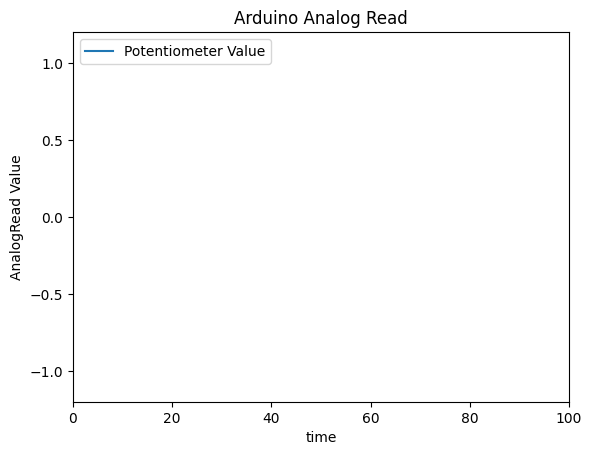

AttributeError: 'serialPlot' object has no attribute 'close'

In [4]:
portName = '/dev/ttyUSB0'
baudRate = 9600
maxPlotLength = 100
main(portName, baudRate, maxPlotLength)

In [2]:
df = pd.read_csv('data/data.csv')
df

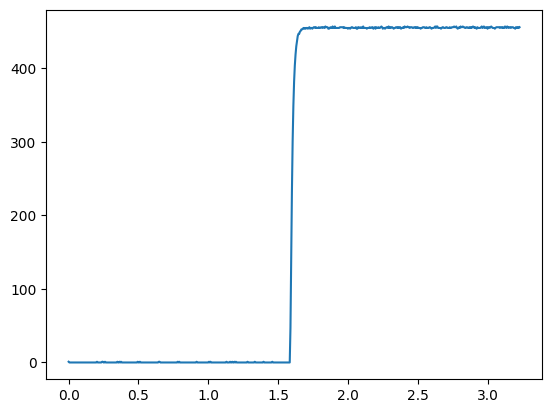

In [ ]:
T = 192 
df['segundos'] = df.index/T
tempo = df['segundos'].values
valores = df['Channel 1'].values
fig, ax = plt.subplots()
ax.plot(tempo, valores)

In [ ]:
max_value = max(df['Channel 1'])
df['diff'] = abs(df['Channel 1'] - max_value*0.63)
i = df.loc[df['Channel 1'] == 0.0].index[-1]
time1 = float(df.loc[df['diff'] == min(df['diff']), 'segundos'])
time0 = df.loc[i,'segundos']
time_last = df.loc[df.index[-1], 'segundos']
tau = float(time1 - time0)
time0,time1,time_last, tau

(1.5833333333333333, 1.6041666666666667, 3.2291666666666665)

0.02083333333333348

In [ ]:
num = [max_value]
den = [tau, 1]
t_total = time_last - time1
t = np.linspace(0,t_total,100)
y = transfer_function(num, den, t)
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta a Degrau da Função Transferência')
plt.show()